<a href="https://colab.research.google.com/github/surabhipandey18/Doraemon/blob/main/Doraemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# **Characters**

In [80]:
#Dataset input
df_characters = pd.read_csv('/content/drive/MyDrive/DL study/Doraemon/character_list.csv')
df_characters.head()

,Orginal Name,English Name,Gender,Species,Age,Birthd Date,first_appearance,Role,Occupation,Personality,Likes,Dislike,Best Friends,Rivals,Family Member,Voice Actor,Voice Actor ( English ),Signature Gadget,Catch Phrase,Character Designer
0,ドラえもん,Doraemon,Robot,Robot Cat,Unknown,"September 3, 2112",Doraemon's Birth (1979),Main,Nobita's caretaker,"Kind, Helpful, Cowardly","Dorayaki, Helping Nobita","Mice, Being called fat","Nobita, Shizuka","Gian, Suneo",Dorami (sister),Wasabi Mizuta,Mona Marshall,"Anywhere Door, Time Machine",Nobi-kun!,Fujiko F. Fujio
1,野比 のび太,Nobita Nobi,Male,Human,10,August 7,Episode 1,Main,Elementary Student,"Lazy, Clumsy, Good-hearted","Sleeping, Playing","Homework, Gian's bullying","Doraemon, Shizuka","Gian, Suneo","Tamako (Mom), Nobisuke (Dad)",Megumi Ōhara,Johnny Yong Bosch,None (borrows gadgets),"Doraemon, help me!",Fujiko F. Fujio
2,源 静香,Shizuka Minamoto,Female,Human,10,October 20,Episode 1,Main,Elementary Student,"Kind, Intelligent, Gentle","Bathing, Violin","Dirt, Creepy bugs","Nobita, Doraemon",NaN,"Mother, Father",Yumi Kakazu,Johnny Yong Bosch,NaN,"Nobita-kun, ganbatte!",Fujiko F. Fujio
3,剛田 武,Gian (Takeo Goda),Male,Human,11,June 15,Episode 1,Main,Elementary Student,"Bully, Loud, Music-lover","Singing, Meat","Losing, Being ignored","Suneo, Nobita (reluctantly)",Nobita,"Mother, Father",Subaru Kimura,Kaiji Tang,NaN,Singing terribly,Fujiko F. Fujio
4,骨川 スネ夫,Suneo Honekawa,Male,Human,10,February 29,Episode 1,Main,Elementary Student,"Vain, Sneaky, Rich","Showing off, New gadgets","Being poor, Gian's bullying","Gian, Shizuka",Nobita,"Mother, Father",Tomokazu Seki,Brian Beacock,NaN,I’m better than you!,Fujiko F. Fujio


In [81]:
image_path = '/content/drive/MyDrive/DL study/Doraemon/images/images'

In [82]:
##Validation and Training data generation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    image_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 104 images belonging to 5 classes.
Found 23 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

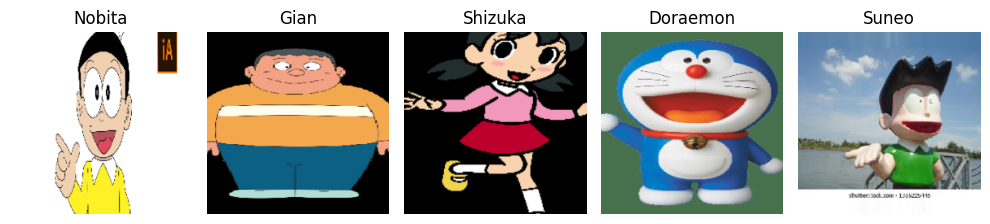

In [83]:
#Images and their Label plotting
images, labels = next(train_generator)
classes = list(train_generator.class_indices.keys())

images_per_class= {}

plt.figure(figsize=(10, 10))
for i in range(images.shape[0]):
    pred_class_index = labels[i].argmax()
    pred_class = classes[pred_class_index]
    if pred_class not in images_per_class:
        images_per_class[pred_class] = images[i]
    if len(images_per_class[pred_class]) == len(classes):
        break

plt.figure(figsize=(10, 10))
i = 1
for classes, images in images_per_class.items():
    plt.subplot(1, len(images_per_class), i)
    plt.imshow(images)
    plt.title(classes)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()



In [187]:
#model training
model = keras.Sequential([layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(64, (3, 3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Conv2D(128, (3, 3), activation='relu'),
                          layers.MaxPooling2D((2, 2)),
                          layers.Flatten(),
                          layers.Dense(128, activation='relu'),
                          layers.Dropout(0.5),
                          layers.Dense(len(classes), activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [194]:
#train CNN
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = val_generator
  )

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5780 - loss: 1.2639 - val_accuracy: 0.4783 - val_loss: 1.6479
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.4655 - loss: 1.3730 - val_accuracy: 0.7391 - val_loss: 1.2487
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5487 - loss: 1.0825 - val_accuracy: 0.5652 - val_loss: 1.3101
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.5715 - loss: 1.0267 - val_accuracy: 0.6957 - val_loss: 1.3193
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7623 - loss: 0.7746 - val_accuracy: 0.6957 - val_loss: 1.0404
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6839 - loss: 0.7063 - val_accuracy: 0.6522 - val_loss: 1.4129
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.7772 - loss: 0.5940 - val_accuracy: 0.6522 - val_loss: 1.1000
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.8381 - loss: 0.4964 - val_accuracy: 0.7826 - val_loss: 0.7883
Epoch 9/

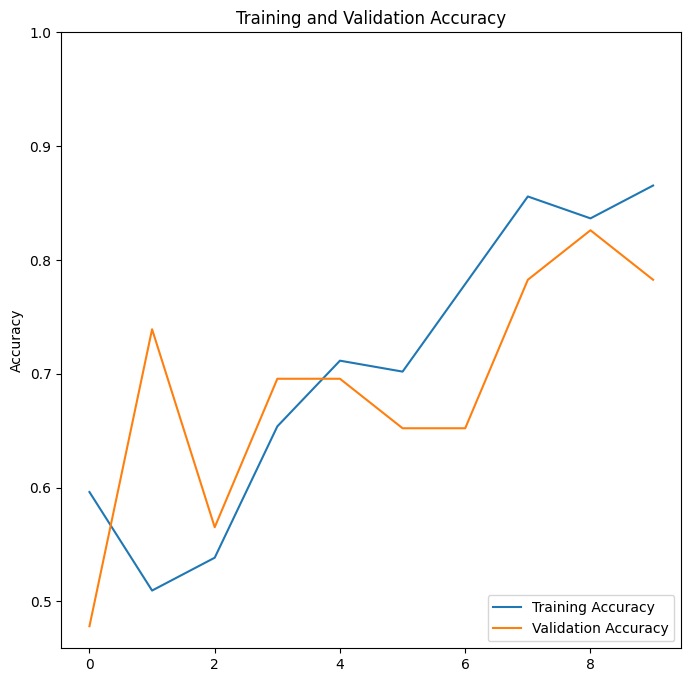

In [198]:
#Accuracy and loss graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


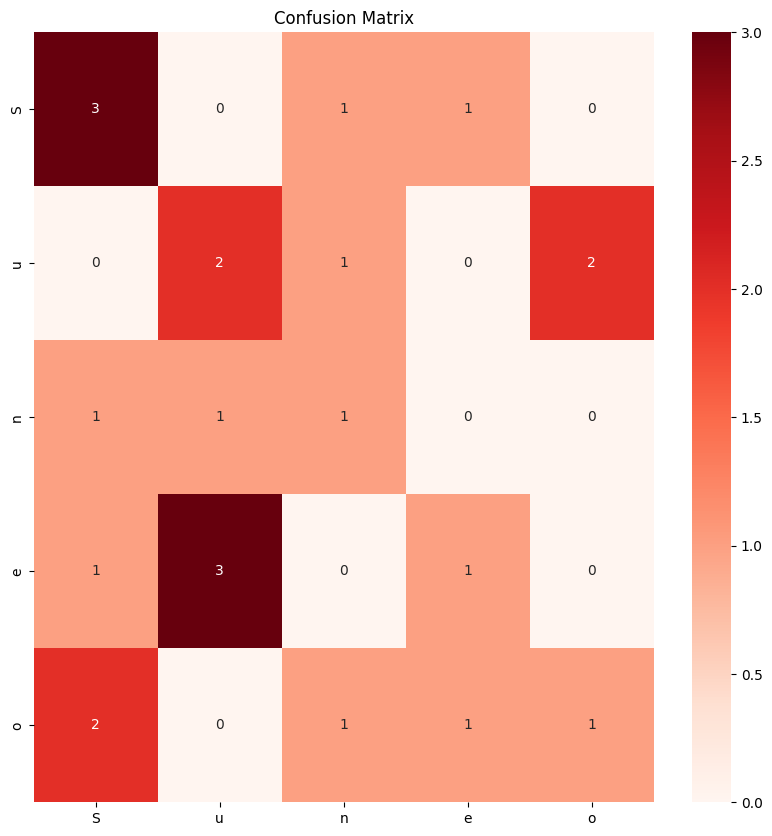

In [203]:
#confusion matrix
y_pred = model.predict(val_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.show()

### **Episodes**

In [84]:
#Dataset laod
df_episodes = pd.read_csv('/content/drive/MyDrive/DL study/Doraemon/episodes_list.csv')
df_episodes.head()

,episode_id,title_en,title_jp,air_date,duration,season,episode_num,plot,main_gadget,gadget_category,theme,is_filler,director,writer,viewership_rating,is_remake,moral_lesson
0,S01E01,Nobita's Future Diary,のび太の未来日記,1979-04-02,22,1,1,Nobita uses a future diary to change his fate ...,Future Diary,Time Manipulation,Consequences,False,Tsutomu Shibayama,Fujiko F. Fujio,12.5,False,Honesty is the best policy.
1,S01E02,The Prophecy of the Fortune-Telling Card,うらないカードの予言,1979-04-09,22,1,2,Nobita uses fortune-telling cards to predict t...,Fortune-Telling Cards,Divination,Irony,False,Tsutomu Shibayama,Fujiko F. Fujio,11.8,False,Don't rely too much on predictions.
2,S01E03,The Time Machine is Lost!,タイムマシンがなくなった！,1979-04-16,22,1,3,"Doraemon's time machine goes missing, causing ...",Time Machine,Time Travel,Responsibility,False,Tsutomu Shibayama,Fujiko F. Fujio,10.9,False,Take care of important things.
3,S01E04,The Candid Camera,正直太郎,1979-04-23,22,1,4,Nobita uses a truth-telling camera that forces...,Candid Camera,Truth Enforcement,Honesty,False,Tsutomu Shibayama,Fujiko F. Fujio,11.2,False,Truth can be uncomfortable but necessary.
4,S01E05,The Time Furoshiki,タイムふろしき,1979-04-30,22,1,5,Nobita wraps objects to age or rejuvenate them...,Time Furoshiki,Time Manipulation,Consequences,False,Tsutomu Shibayama,Fujiko F. Fujio,10.5,False,Respect the natural flow of time.


In [85]:
df_episodes.shape

(50, 17)

In [86]:
#average rating of different seasons
df_episodes.groupby('season')['viewership_rating'].mean()

,viewership_rating
season,
1,11.642


In [87]:
#average duration
df_episodes.groupby('season')['duration'].mean()

,duration
season,
1,22.0


In [88]:
#Which were the main gadgets
df_episodes.groupby('season')['main_gadget'].value_counts()

season  main_gadget          
1       Time Machine             2
        Air Gun                  1
        Alibi Maker              1
        Anger Stamp              1
        Animal Cookies           1
        Anywhere Door            1
        Bamboo-Copter            1
        Candid Camera            1
        Chef Robot               1
        Cloud Solidifier         1
        Copying Toast            1
        Diorama Set              1
        Dream Director           1
        Dream Viewer             1
        Emotion Controller       1
        Fortune Paper            1
        Fortune-Telling Cards    1
        Future Diary             1
        Ghost Camera             1
        Ghost Cape               1
        Gulliver Tunnel          1
        Human Magnet             1
        Human Puppet             1
        Human Switch             1
        Lie Detector             1
        Lie-Speaking Mirror      1
        Life-Giving Snow         1
        Lottery Cutter           1
        Lottery Ticket           1
        Memory Bread             1
        Monster Capsule          1
        Opposite Mirror          1
        Pass Loop                1
        Pet Stone                1
        Robot Bag                1
        Santa Machine            1
        Shadow Controller        1
        Small Light              1
        Storybook Portal         1
        Super Glue               1
        Time Bomb                1
        Time Capsule             1
        Time Cloth               1
        Time Copier              1
        Time Furoshiki           1
        Time TV                  1
        Time Zone Clock          1
        Weather Box              1
        What-If Phone Booth      1
Name: count, dtype: int64

In [89]:
#let's see different gadget categories
df_episodes['gadget_category'].value_counts()

,count
gadget_category,
Time Manipulation,2
Illusion,2
Automation,2
Animation,2
Time Travel,1
Truth Enforcement,1
Flight,1
Size Manipulation,1
Surveillance,1


In [90]:
#themes
df_episodes['theme'].value_counts()

,count
theme,
Responsibility,6
Consequences,4
Perspective,3
Free Will,2
Honesty,2
Identity,2
Irony,1
Adventure,1
Privacy,1


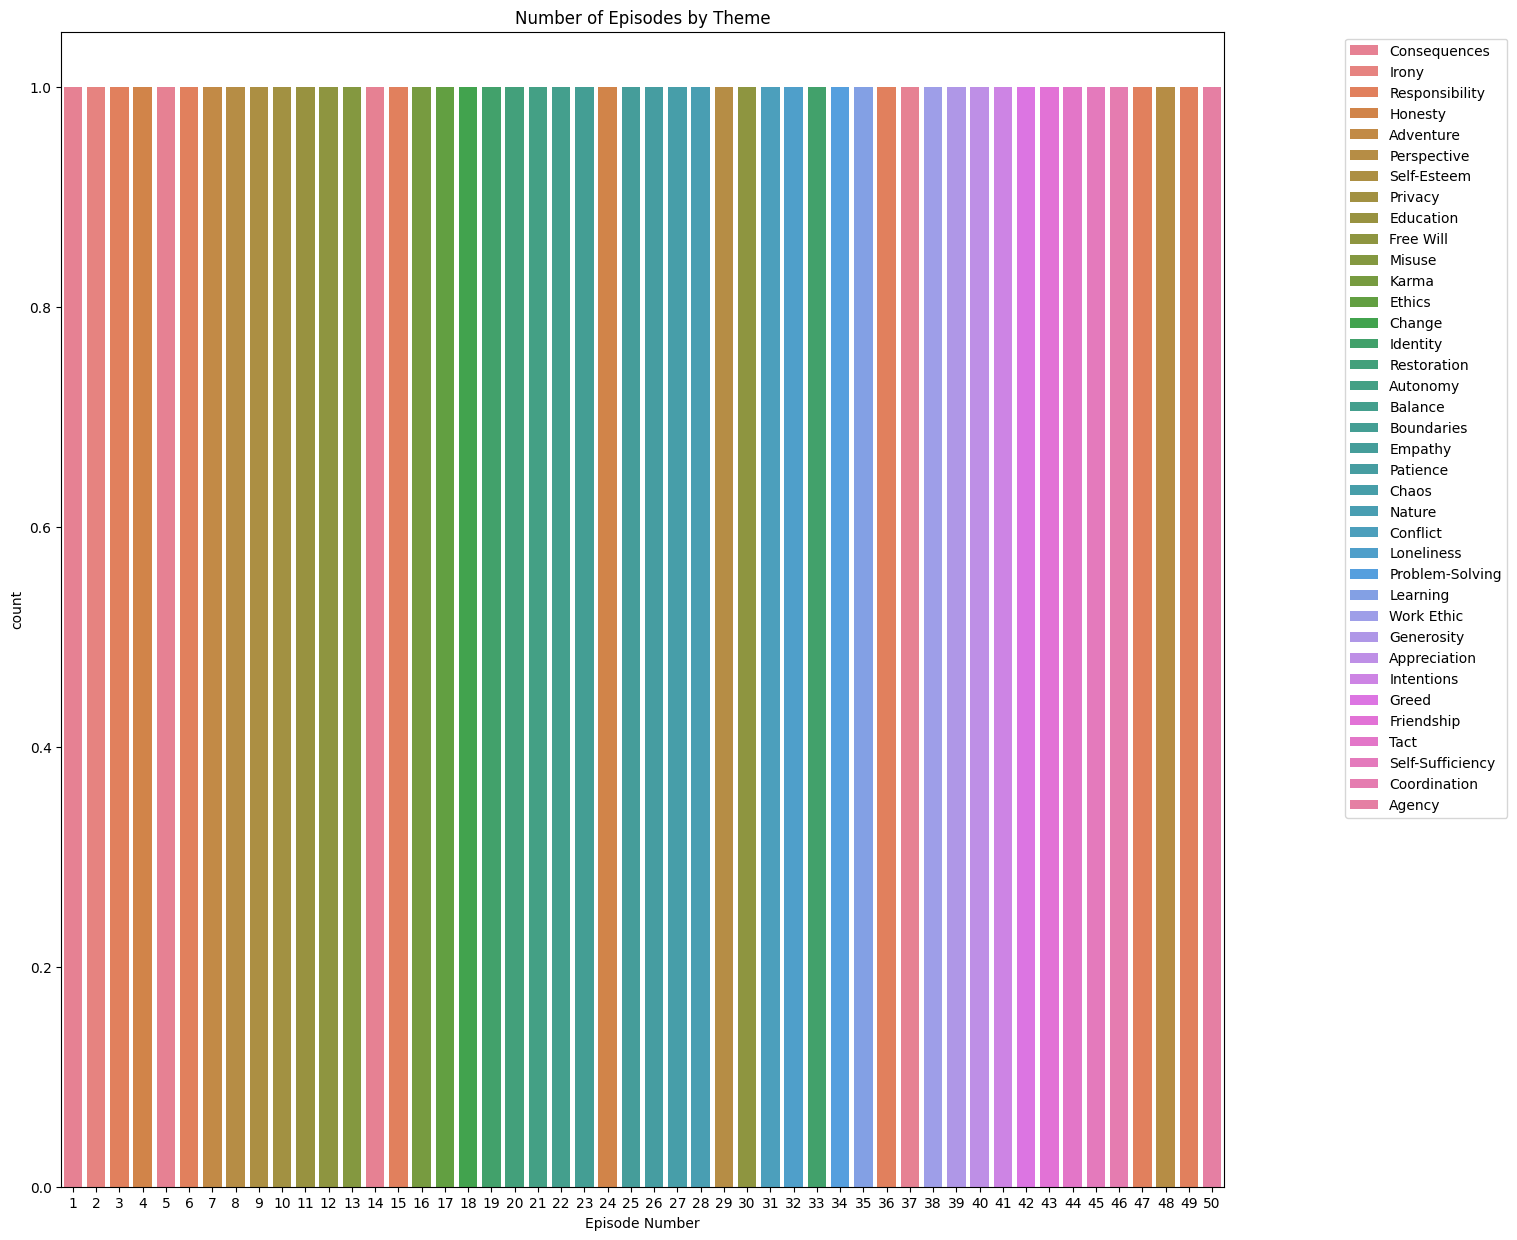

In [91]:
#plot of different themes and seasons
plt.figure(figsize=(15,15))
sns.countplot(data=df_episodes, x='episode_num', hue='theme')
plt.title('Number of Episodes by Theme')
plt.xlabel('Episode Number')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [92]:
#moral lessons
df_episodes['moral_lesson']

,moral_lesson
0,Honesty is the best policy.
1,Don't rely too much on predictions.
2,Take care of important things.
3,Truth can be uncomfortable but necessary.
4,Respect the natural flow of time.
5,With great power comes great responsibility.
6,Practice makes perfect.
7,Size doesn't define importance.
8,Believe in your true self.
9,Respect others' privacy.


### **Gadgets**

In [93]:
#Dataset Load
df_gadget = pd.read_csv('/content/drive/MyDrive/DL study/Doraemon/gadget_list.csv')
df_gadget.head()

,gadget_name_original,gadget_name_english,first_appearance_episode,function,used_by,main_user,category,success_rate,failure_rate,is_recurring,notes
0,どこでもドア,Anywhere Door,1,Teleports users to any location instantly,"Nobita, Doraemon, friends",Nobita,Transportation,95.0,5.0,Yes,Most iconic; rarely fails unless misused
1,タケコプター,Hopter,2,Propeller for personal flight,"Nobita, Gian, Suneo",Nobita,Transportation,70.0,30.0,Yes,Fails due to low battery or clumsiness
2,タイムマシン,Time Machine,5,Travels through time,"Nobita, Doraemon",Nobita,Time Travel,90.0,10.0,Yes,Kept in Nobita's desk drawer
3,暗記パン,Memory Bread,10,Absorbs text when pressed on book pages,Nobita,Nobita,Education,60.0,40.0,No,Often eaten before use
4,空気砲,Air Cannon,15,Shoots compressed air as a weapon,"Nobita, Gian",Gian,Weapon,85.0,15.0,Yes,Used against bullies


In [110]:
#different categories of gadgets
df_gadget['category'].value_counts()

,count
category,
Fantasy,87
Time Travel,81
Special,61
Space,36
Technology,18
Meta,17
Science,17
Psychic,16
Game,14


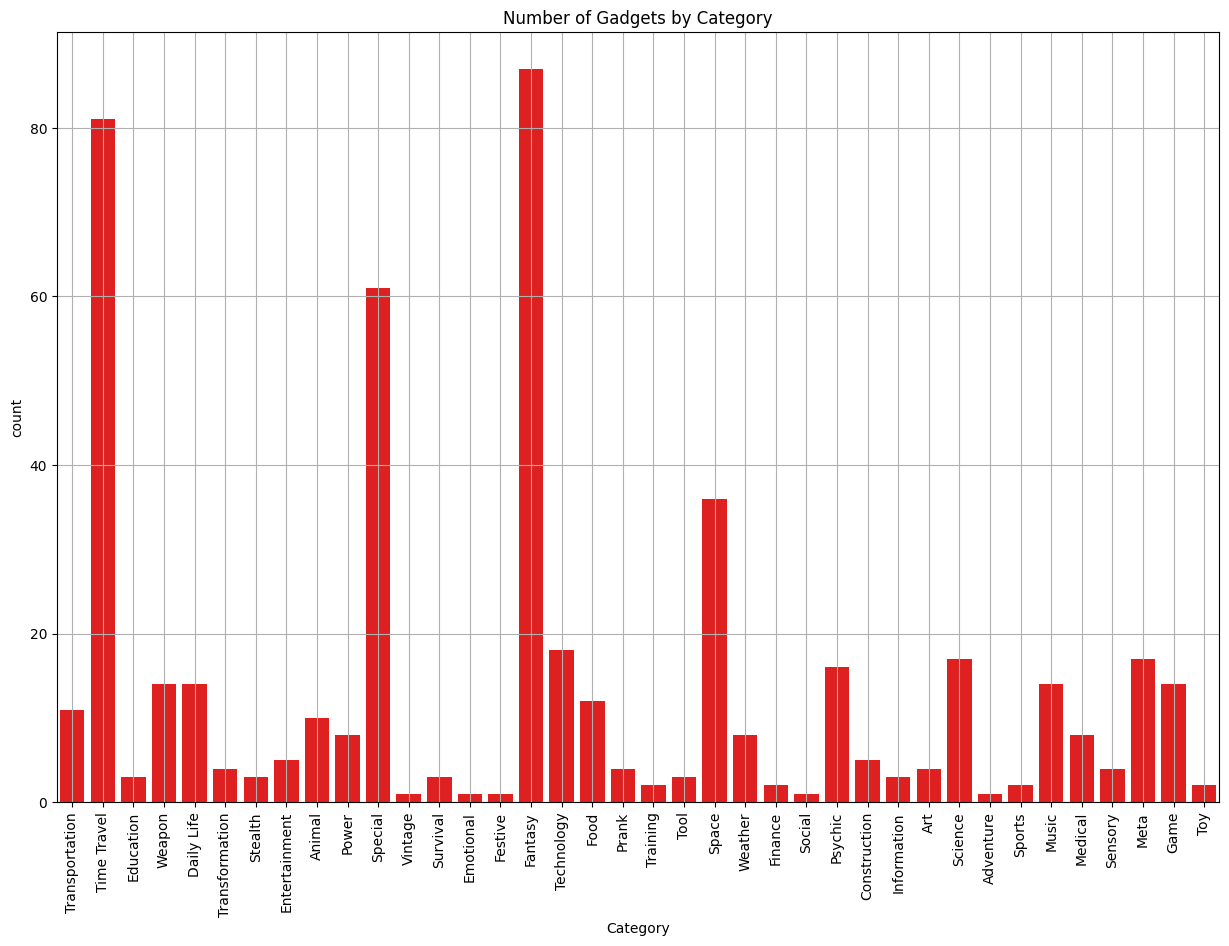

In [126]:
#Category of gadgets plotting
plt.figure(figsize=(15,10))
sns.countplot(data=df_gadget, x='category', color = 'red')
plt.title('Number of Gadgets by Category')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [128]:
#most successful gadget rates
df_gadget['success_rate'].value_counts()

,count
success_rate,
100.000,143
95.000,44
90.000,40
0.000,36
80.000,32
85.000,29
70.000,27
60.000,22
50.000,16


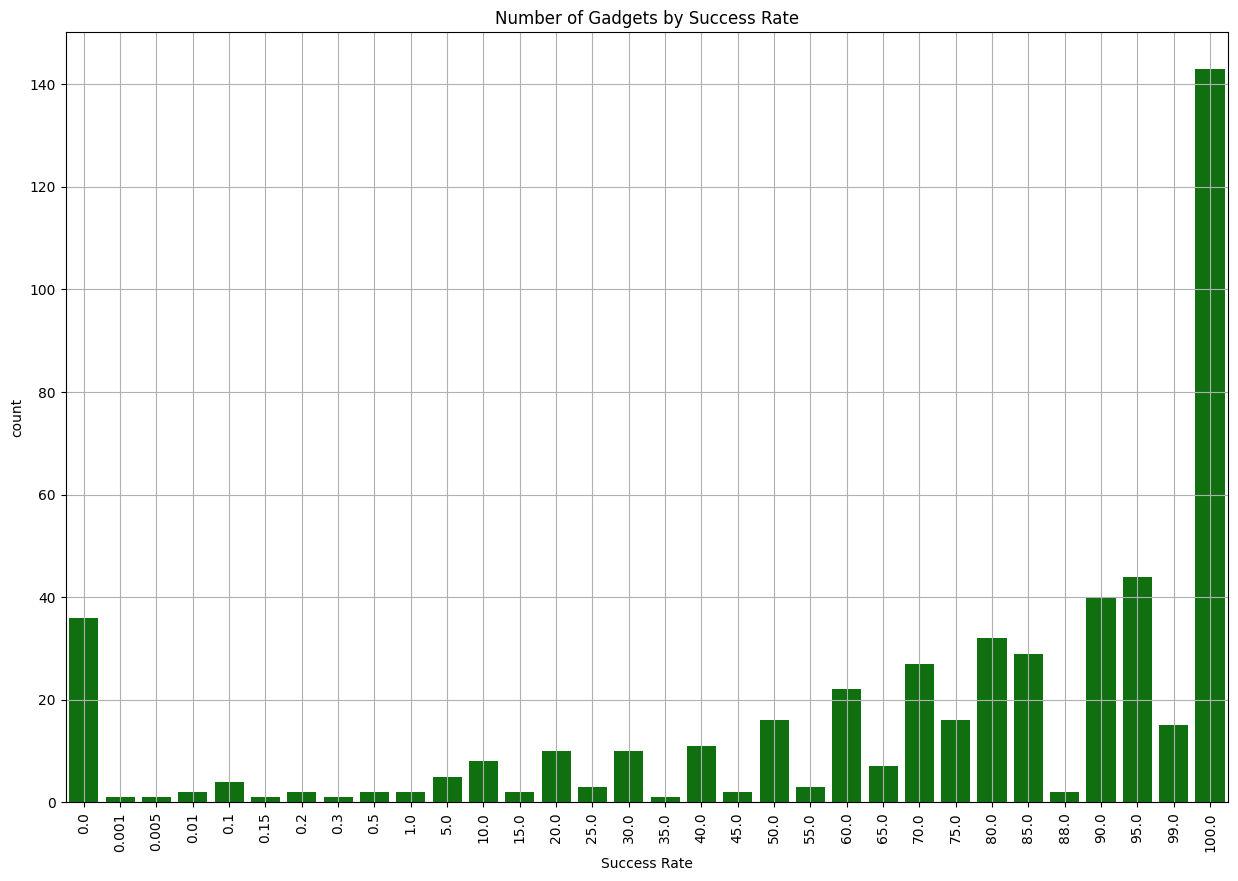

In [129]:
#Success rate of gadgets
plt.figure(figsize=(15,10))
sns.countplot(data=df_gadget, x='success_rate', color = 'green')
plt.title('Number of Gadgets by Success Rate')
plt.xlabel('Success Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [130]:
#failure rate of gadgets
df_gadget['failure_rate'].value_counts()

,count
failure_rate,
0.000,143
5.000,44
10.000,40
100.000,36
20.000,32
15.000,29
30.000,27
40.000,22
50.000,16


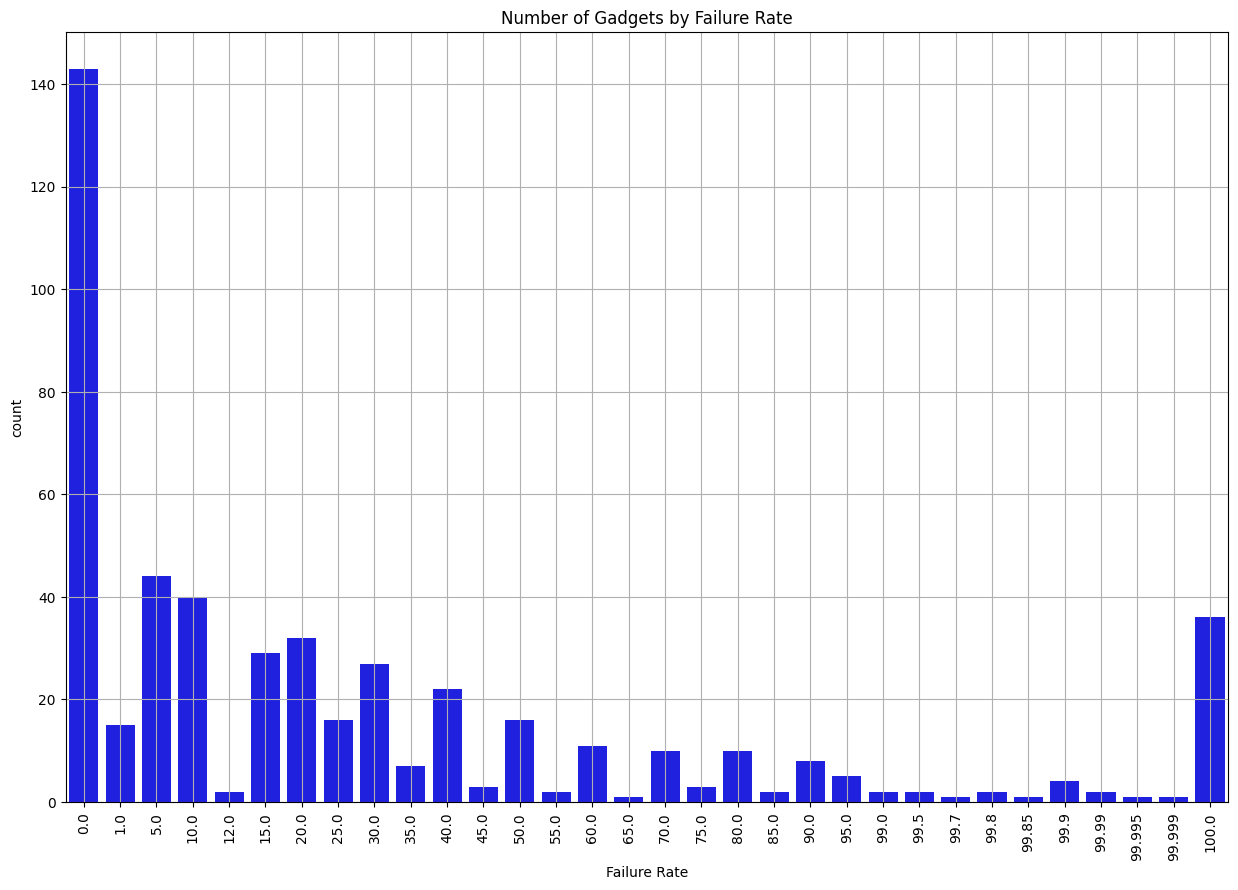

In [132]:
#failure rates of gadgets plotting
plt.figure(figsize=(15,10))
sns.countplot(data=df_gadget, x='failure_rate', color = 'blue')
plt.title('Number of Gadgets by Failure Rate')
plt.xlabel('Failure Rate')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### **Doraemon Movies**

In [135]:
#Dataset loading
df_movie = pd.read_csv('/content/drive/MyDrive/DL study/Doraemon/movie_list.csv')
df_movie.head()

,Title (EN),Title (JP),Year,Duration (min),Director,Production Studio,Box Office (¥ billion),IMDb Rating,MyAnimeList Score,Main Theme,...,Awards Won,Animation Studio,Screenwriter,Music Composer,Number of Theaters (Japan),Opening Weekend Earnings (¥ million),Home Video Sales (Units),Number of Gadgets Used,Time Travel Events,Alternate Universes Visited
0,Nobita's Dinosaur,のび太の恐竜,1980,92,Hiroshi Fukutomi,Shin-Ei Animation,1.50,7.5,7.8,Adventure,...,NaN,Shin-Ei Animation,Fujiko F. Fujio,Shunsuke Kikuchi,163,120,50000,5,Yes,No
1,The Records of Nobita Spaceblazer,のび太の宇宙開拓史,1981,91,Hiroshi Fukutomi,Shin-Ei Animation,1.70,7.3,7.7,Sci-Fi,...,NaN,Shin-Ei Animation,Fujiko F. Fujio,Shunsuke Kikuchi,165,150,55000,8,Yes,Yes
2,Nobita and the Haunts of Evil,のび太の大魔境,1982,92,Hiroshi Fukutomi,Shin-Ei Animation,1.60,7.4,7.9,Adventure,...,NaN,Shin-Ei Animation,Fujiko F. Fujio,Shunsuke Kikuchi,167,140,52000,6,No,No
3,Nobita's Great Adventure into the Underworld,のび太の魔界大冒険,1984,93,Hiroshi Fukutomi,Shin-Ei Animation,1.65,7.6,8.0,Fantasy,...,NaN,Shin-Ei Animation,Fujiko F. Fujio,Shunsuke Kikuchi,170,160,60000,10,No,Yes
4,Nobita's Little Star Wars,のび太の宇宙小戦争,1985,99,Tsutomu Shibayama,Shin-Ei Animation,1.55,7.7,8.1,Sci-Fi,...,NaN,Shin-Ei Animation,Fujiko F. Fujio,Shunsuke Kikuchi,172,155,58000,7,No,Yes


In [136]:
#get all the features
df_movie.columns

Index(['Title (EN)', 'Title (JP)', 'Year', 'Duration (min)', 'Director',
       'Production Studio', 'Box Office (¥ billion)', 'IMDb Rating',
       'MyAnimeList Score', 'Main Theme', 'Synopsis',
       'Key Characters Introduced', 'Main Cast (Voices)', 'Awards Won',
       'Animation Studio', 'Screenwriter', 'Music Composer',
       'Number of Theaters (Japan)', 'Opening Weekend Earnings (¥ million)',
       'Home Video Sales (Units)', 'Number of Gadgets Used',
       'Time Travel Events', 'Alternate Universes Visited'],
      dtype='object')

In [141]:
#average duration
avg = df_movie['Duration (min)'].mean()
print("Average duration of movie in minutes: ",int(avg), "mins")

Average duration of movie in minutes:  98 mins


In [149]:
#average imdb rating
avg = df_movie['IMDb Rating'].mean()
print(f"Average imdb rating of movie: {avg:.1f}")

Average imdb rating of movie: 7.3


In [150]:
#average box office
avg = df_movie['Box Office (¥ billion)'].mean()
print(f"Average box office of movie: {avg:.2f}")

Average box office of movie: 2.77


In [168]:
#Average of weekend earning
avg_weekend = df_movie['Opening Weekend Earnings (¥ million)'].mean()
print(f"Average opening weekend earnings of movie: {avg_weekend:.2f} ¥ million")

Average opening weekend earnings of movie: 294.27 ¥ million


In [181]:
#average home video sales
avg_home = df_movie['Home Video Sales (Units)'].mean()
print(f"Average home video sales of movie: {int(avg_home)} Units")

Average home video sales of movie: 3008390 Units


In [151]:
#Main theme
df_movie['Main Theme'].value_counts()

,count
Main Theme,
Sci-Fi,16
Adventure,11
Fantasy,11
Eco-Fantasy,1
Drama,1
Musical,1


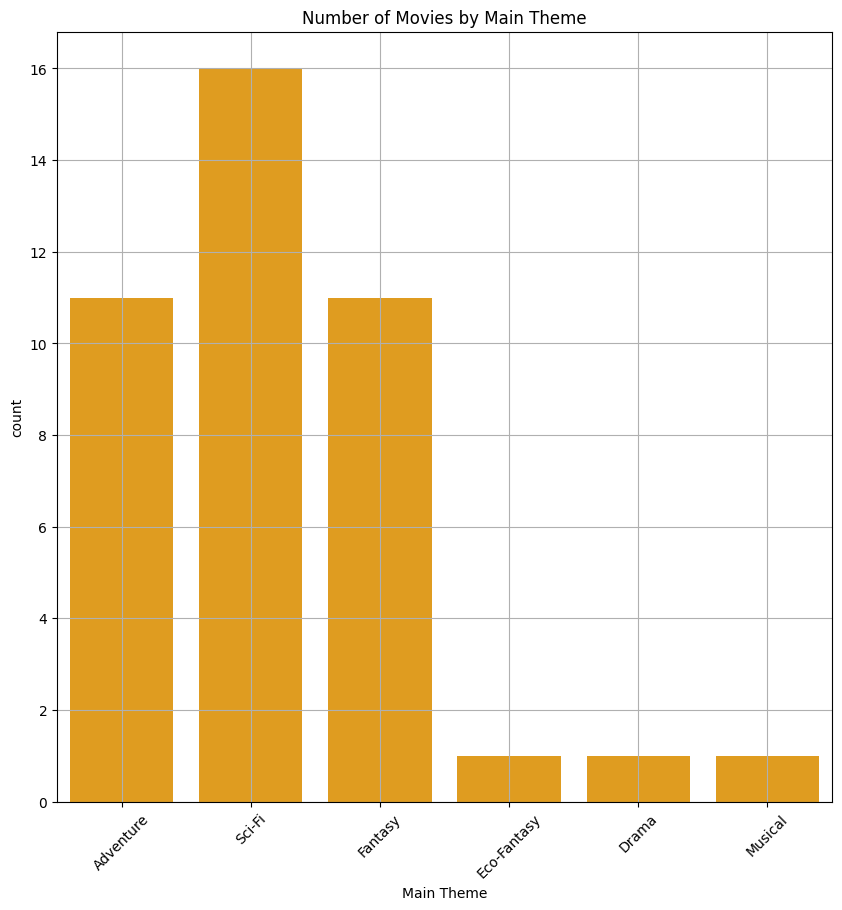

In [154]:
#plot of main themes of movies
plt.figure(figsize=(10,10))
sns.countplot(data=df_movie, x='Main Theme', color = 'orange')
plt.title('Number of Movies by Main Theme')
plt.xlabel('Main Theme')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [155]:
#how many times they had time travelled
df_movie['Time Travel Events'].value_counts()

,count
Time Travel Events,
Yes,26
No,15


In [156]:
#How many they went to alternate universe
df_movie['Alternate Universes Visited'].value_counts()

,count
Alternate Universes Visited,
Yes,27
No,14


In [175]:
#what awards did movies win
df_movie[['Title (EN)', 'Awards Won']][df_movie['Awards Won'].notna()].head()

,Title (EN),Awards Won
32,Stand By Me Doraemon,Japan Academy Prize


In [162]:
#Movies and their synopsis
df_movie[['Title (EN)','Synopsis']].head()

,Title (EN),Synopsis
0,Nobita's Dinosaur,"Nobita finds a dinosaur egg and raises it, lea..."
1,The Records of Nobita Spaceblazer,Nobita and friends explore a distant planet to...
2,Nobita and the Haunts of Evil,The gang explores a hidden African kingdom rul...
3,Nobita's Great Adventure into the Underworld,Nobita and friends enter a magical world to de...
4,Nobita's Little Star Wars,Nobita helps a tiny alien civilization fight a...


In [165]:
#opening weekend earnings movies
df_movie[['Title (EN)', 'Opening Weekend Earnings (¥ million)']].head()

,Title (EN),Opening Weekend Earnings (¥ million)
0,Nobita's Dinosaur,120
1,The Records of Nobita Spaceblazer,150
2,Nobita and the Haunts of Evil,140
3,Nobita's Great Adventure into the Underworld,160
4,Nobita's Little Star Wars,155


In [177]:
#key characters introduced in movies
df_movie[['Title (EN)', 'Key Characters Introduced']][df_movie['Key Characters Introduced'].notna()]

,Title (EN),Key Characters Introduced
0,Nobita's Dinosaur,Pterosaur
1,The Records of Nobita Spaceblazer,Roppuru
2,Nobita and the Haunts of Evil,Doronpa
3,Nobita's Great Adventure into the Underworld,Demons
4,Nobita's Little Star Wars,Papi
5,Nobita and the Steel Troops,Lilulu
6,Nobita and the Knights on Dinosaurs,Dinosaurs
8,Nobita and the Birth of Japan,Gigazombie
9,Nobita and the Animal Planet,Chippo
10,Nobita's Dorabian Nights,Genie


### **Songs**

In [182]:
#Songs dataset
df_songs = pd.read_csv("/content/drive/MyDrive/DL study/Doraemon/songs_list.csv")
df_songs.head()

,Title,Title (Japanese),Artist,Type,Episode Number,Movie Title,Year,Lyrics Excerpt,Duration (sec),Language
0,Boku Doraemon,ぼくドラえもん,Nobuyo Oyama,Insert Song,Ep 50,-,1979,ぼくドラえもん 2112ねんから...,60,Japanese
1,Doraemon no Uta,ドラえもんのうた,Kumiko Osugi,Opening (OP),All episodes,-,1979,こんなこといいな できたらいいな...,90,Japanese
2,Santa Claus wa Doko no Hito,サンタクロースはどこのひと,Kumiko Osugi,Ending (ED),Ep 1-26,-,1979,サンタクロースはどこのひと...,85,Japanese
3,Doraemon Ekaki-uta,ドラえもんえかきうた,Nobuyo Oyama,Insert Song,Ep 100,-,1980,ドラえもんがいた～...,45,Japanese
4,Yume no Hito,夢のひと,Shihoko Hirata,Insert Song,-,Nobita's Dinosaur,1980,夢のひとは どこにいる...,110,Japanese
